## Import Libraries

In [1]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
#import scikitplot
#from scikitplot.metrics import plot_confusion_matrix

# Create a Dataframe for reading and analysing the text files

In [2]:
df_train = pd.read_csv('./Dataset/train.txt', header =None, sep =';', names = ['Input','sents'], encoding='utf-8')
df_test = pd.read_csv('./Dataset/test.txt', header = None, sep =';', names = ['Input','sents'],encoding='utf-8')
df_val=pd.read_csv('./Dataset/val.txt',header=None,sep=';',names=['Input','sents'],encoding='utf-8')

In [3]:
df_train.sents.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: sents, dtype: int64

## Reading the Train and Validation Data

In [4]:
X=df_train['Input']


In [5]:
lst=[]
for i in X:
  lst.append(len(i))


In [6]:
len1=pd.DataFrame(lst)
len1.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


In [7]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)

# Trying to fix a length for the embedding layers' input

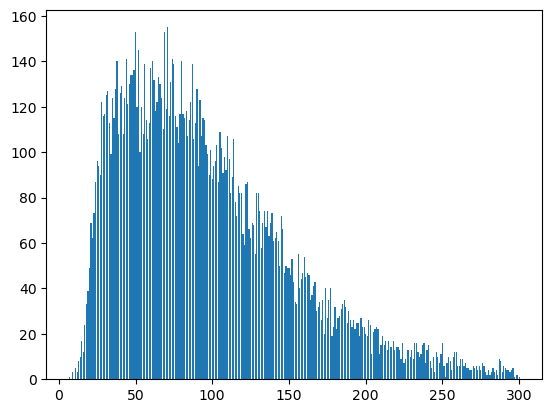

In [8]:
#layers like repeted word that complete the sentence (is, are, etc)
plt.bar(range(7,301),cts)
plt.show()

# Using The tokenizer Class to convert the sentences into word vectors

In [9]:
#levaing the last word cuz its empty '\n'
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [47]:
#the size of fixed words after the fix
words=len(tokenizer.word_index)

In [48]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [49]:
df_train['sents']=df_train.sents.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [50]:
Y_train=df_train['sents'].values


# One hot Encoding the Emotion Values

In [51]:
Y_train_f=to_categorical(Y_train)

In [52]:
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [53]:
X_val=df_val['Input']
Y_val=df_val.sents.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [54]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [55]:
Y_val_f=to_categorical(Y_val)

In [56]:
Y_val_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout


# Creating a Model

In [58]:
model=Sequential()
#each layer of words = 15213, and max length= 80
model.add(Embedding(words,64,input_length=80))
#poll datat 
model.add(Dropout(0.6))
#apply the BLSTM with the length
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 64)            973632    
                                                                 
 dropout_1 (Dropout)         (None, 80, 64)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 80, 160)          92800     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 320)              410880    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 1926      
                                                                 
Total params: 1,479,238
Trainable params: 1,479,238
No

# Compiling and running the model

In [59]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 77s 140ms/step - loss: 1.2476 - accuracy: 0.5173 - val_loss: 0.7142 - val_accuracy: 0.7480
Epoch 2/12
500/500 [==============================] - 68s 135ms/step - loss: 0.4921 - accuracy: 0.8265 - val_loss: 0.3139 - val_accuracy: 0.8965
Epoch 3/12
500/500 [==============================] - 67s 133ms/step - loss: 0.2944 - accuracy: 0.8970 - val_loss: 0.2556 - val_accuracy: 0.9075
Epoch 4/12
500/500 [==============================] - 67s 134ms/step - loss: 0.2155 - accuracy: 0.9231 - val_loss: 0.2246 - val_accuracy: 0.9165
Epoch 5/12
500/500 [==============================] - 71s 141ms/step - loss: 0.1873 - accuracy: 0.9321 - val_loss: 0.2144 - val_accuracy: 0.9245
Epoch 6/12
500/500 [==============================] - 75s 150ms/step - loss: 0.1394 - accuracy: 0.9482 - val_loss: 0.1967 - val_accuracy: 0.9250
Epoch 7/12
500/500 [==============================] - 77s 153ms/step - loss: 0.1262 - accuracy: 0.9541 - val_loss: 0.2196 - val_ac

# Plotting the Loss and Accuracy Curves

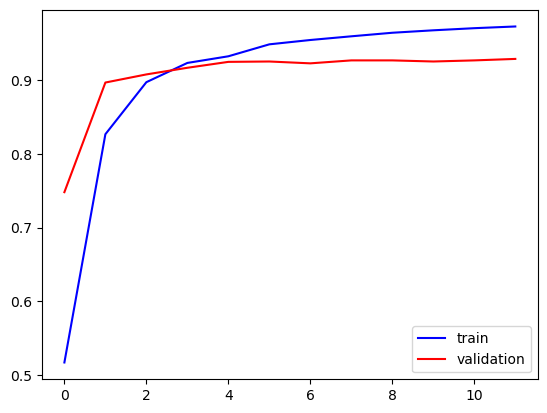

In [61]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

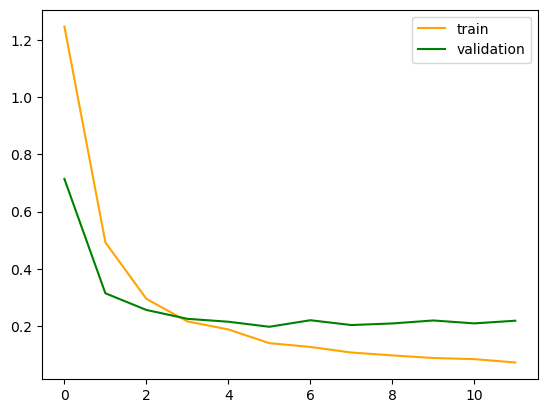

In [62]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

# Checking for Test Data

In [63]:
X_test=df_test['Input']
Y_test=df_test.sents.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [64]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [65]:
Y_test_f=to_categorical(Y_test)

In [66]:
X_test_pad.shape

(2000, 80)

In [67]:
Y_test_f[:7]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

## Accuracy for Test Data, over the train data

In [68]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 3s 54ms/step - loss: 0.2245 - accuracy: 0.9230


[0.22449447214603424, 0.9229999780654907]

## Save the model after trainning

In [69]:
#for later use without trainning
model.save('model.h5')

# Creating a Function to check for Your own Sentence

In [73]:
#Load the model 
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model.h5')


In [79]:
def get_key(value):
    dictionary = {'joy': 0, 'anger': 1, 'love': 2, 'sadness': 3, 'fear': 4, 'surprise': 5}
    max_index = np.argmax(value)
    for key, val in dictionary.items():
        if val == max_index:
            return key



In [84]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
    # used the saved model
  ans=get_key(loaded_model.predict(sentence_padded))
  print("The emotion predicted is",ans)

# Check for Your Own Sentence

In [81]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : happy
1/1 [==============================] - 0s 45ms/step
The emotion predicted is joy


In [82]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : I'm sad
1/1 [==============================] - 0s 44ms/step
The emotion predicted is sadness


In [83]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : I can be a hero
1/1 [==============================] - 0s 40ms/step
The emotion predicted is fear
